# Principal component analysis (PCA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [3]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import confusion_matrix, classification_report

## Breast Cancer Dataset

In [6]:
breast_cancer_dataset = pd.read_csv("Data/breast_cancer_dataset.csv", na_values='?').drop(['Unnamed: 32', 'id'], axis = 1).dropna()
breast_cancer_dataset.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [7]:
breast_cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
categorical_label_encoder = LabelEncoder()
actual_labels = categorical_label_encoder.fit_transform(breast_cancer_dataset["diagnosis"])
breast_cancer_dataset = breast_cancer_dataset.drop(['diagnosis'], axis=1)

In [9]:
breast_cancer_dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


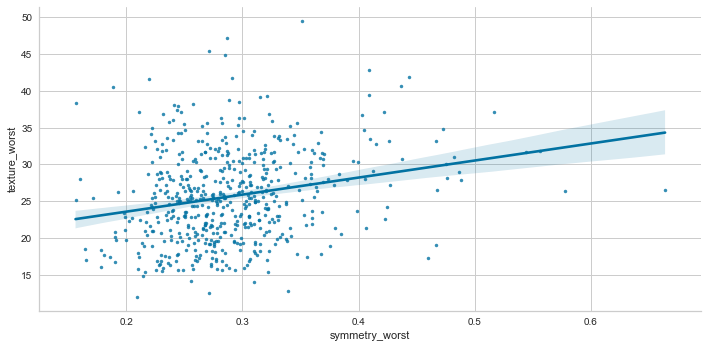

In [10]:
sns.lmplot(x = "symmetry_worst", y = "texture_worst", data = breast_cancer_dataset, 
           fit_reg=True, scatter_kws = {'s':12}, aspect = 2)
plt.show()

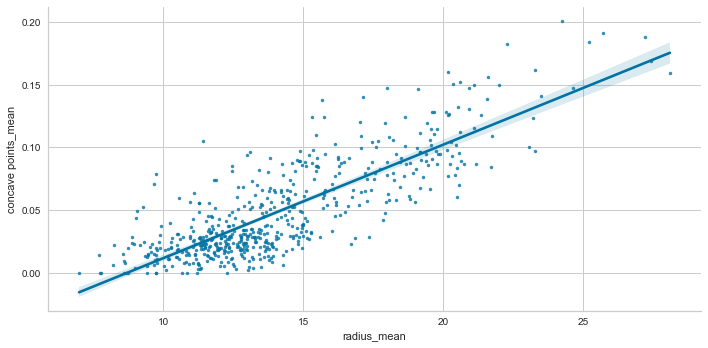

In [11]:
sns.lmplot(x = "radius_mean", y = "concave points_mean", data = breast_cancer_dataset, 
           fit_reg=True, scatter_kws = {'s':12}, aspect = 2)
plt.show()

In [12]:
X = pd.DataFrame(scale(breast_cancer_dataset), index = breast_cancer_dataset.index, 
                 columns = breast_cancer_dataset.columns)
X.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


In [13]:
model_pca = PCA(n_components = 5)
print(model_pca)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [14]:
model_pca_fit = model_pca.fit(X)
model_pca_fit.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947],
       [-0.00853124,  0.06454991, -0.00931422,  0.02869952, -0.1042919 ,
        -0.07409157,  0.00273384, -0.02556354, -0

In [15]:
pca_loadings = pd.DataFrame(model_pca_fit.components_.T, columns=['V1', 'V2', 'V3', 'V4', 'V5'], 
                            index = breast_cancer_dataset.columns)
pca_loadings

,V1,V2,V3,V4,V5
radius_mean,0.218902,-0.233857,-0.008531,0.041409,0.037786
texture_mean,0.103725,-0.059706,0.064550,-0.603050,-0.049469
perimeter_mean,0.227537,-0.215181,-0.009314,0.041983,0.037375
area_mean,0.220995,-0.231077,0.028700,0.053434,0.010331
smoothness_mean,0.142590,0.186113,-0.104292,0.159383,-0.365089
compactness_mean,0.239285,0.151892,-0.074092,0.031795,0.011704
concavity_mean,0.258400,0.060165,0.002734,0.019123,0.086375
concave points_mean,0.260854,-0.034768,-0.025564,0.065336,-0.043861
symmetry_mean,0.138167,0.190349,-0.040240,0.067125,-0.305941
fractal_dimension_mean,0.064363,0.366575,-0.022574,0.048587,-0.044424


In [16]:
data_pca = pd.DataFrame(model_pca_fit.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], 
                        index=X.index)
data_pca.head(10)

,PC1,PC2,PC3,PC4,PC5
0,9.192837,1.948583,-1.123166,3.633733,-1.195112
1,2.387802,-3.768172,-0.529293,1.118263,0.621776
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086
3,7.122953,10.275589,-3.232790,0.152547,-2.960878
4,3.935302,-1.948072,1.389767,2.940639,0.546748
5,2.380247,3.949929,-2.934877,0.941037,-1.056042
6,2.238883,-2.690031,-1.639913,0.149340,0.040360
7,2.143299,2.340244,-0.871947,-0.127043,-1.427436
8,3.174924,3.391813,-3.119986,-0.601296,-1.522291
9,6.351747,7.727174,-4.341916,-3.375204,1.710265


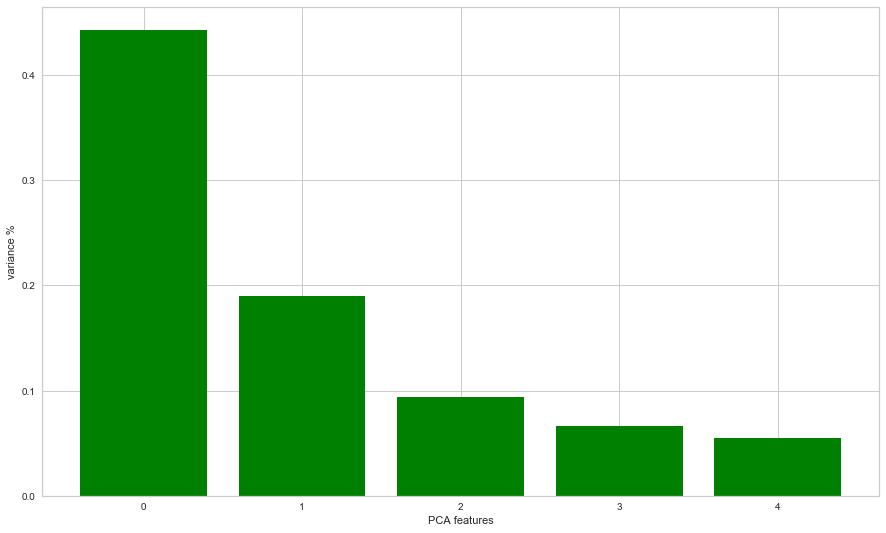

In [17]:
plt.figure(figsize=(15,9))

pca_features = range(model_pca_fit.n_components_)
plt.bar(pca_features, model_pca_fit.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.show()

In [18]:
print("Standard deviation of the principal components: \n\n %s" % np.sqrt(model_pca.explained_variance_))

Standard deviation of the principal components: 

 [3.64760069 2.38775514 1.68015182 1.40859061 1.28515884]


In [19]:
print("Percentage of variance explained by each of the selected components: \n\n %s" % 
      model_pca.explained_variance_ratio_)

Percentage of variance explained by each of the selected components: 

 [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]


In [20]:
print("Cumulative sum of the elements: \n\n %s" % np.cumsum(model_pca.explained_variance_ratio_))

Cumulative sum of the elements: 

 [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274]


In [21]:
data_pca['actual_label'] = actual_labels
data_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,actual_label
0,9.192837,1.948583,-1.123166,3.633733,-1.195112,1
1,2.387802,-3.768172,-0.529293,1.118263,0.621776,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,1
4,3.935302,-1.948072,1.389767,2.940639,0.546748,1
5,2.380247,3.949929,-2.934877,0.941037,-1.056042,1
6,2.238883,-2.690031,-1.639913,0.149340,0.040360,1
7,2.143299,2.340244,-0.871947,-0.127043,-1.427436,1
8,3.174924,3.391813,-3.119986,-0.601296,-1.522291,1
9,6.351747,7.727174,-4.341916,-3.375204,1.710265,1


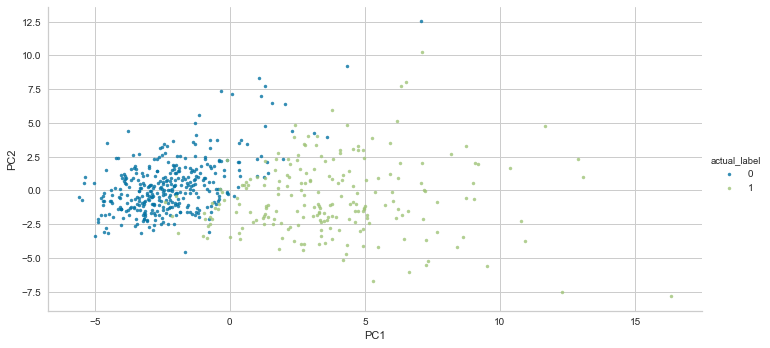

In [22]:
sns.lmplot(x = "PC1", y = "PC2", data = data_pca, hue='actual_label', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

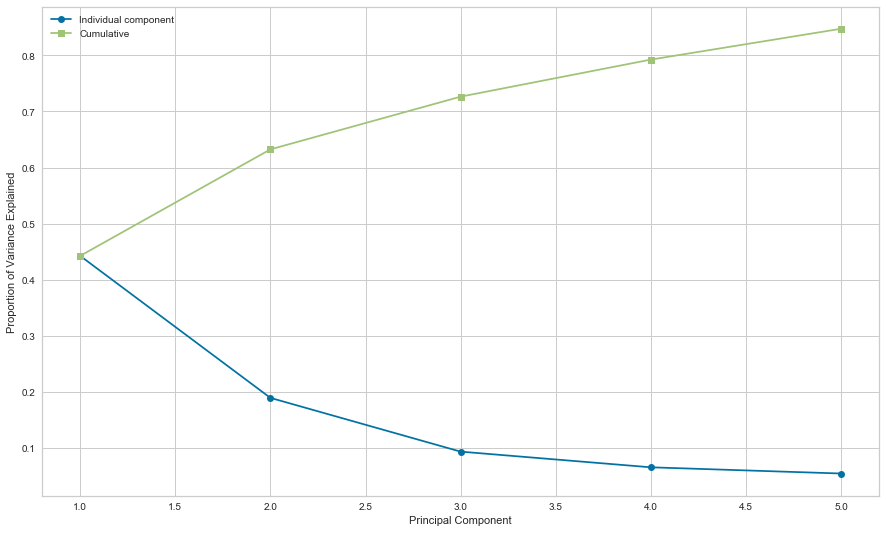

In [23]:
plt.figure(figsize=(15,9))

x_grid = np.arange(1, np.cumsum(model_pca.explained_variance_ratio_).shape[0] + 1)

plt.plot(x_grid, model_pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot(x_grid, np.cumsum(model_pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')

plt.legend()
plt.show()

***

## KMeans using PCs


In [24]:
X_pca = data_pca.drop(["actual_label"], axis=1)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,9.192837,1.948583,-1.123166,3.633733,-1.195112
1,2.387802,-3.768172,-0.529293,1.118263,0.621776
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086
3,7.122953,10.275589,-3.232790,0.152547,-2.960878
4,3.935302,-1.948072,1.389767,2.940639,0.546748


In [25]:
model_kmeans = KMeans(n_clusters = 2)
print(model_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [26]:
model_groups = model_kmeans.fit(X_pca)
model_groups.cluster_centers_

array([[-2.18497103e+00,  1.86857111e-02,  8.79668927e-02,
         3.49038120e-02,  2.18077942e-04],
       [ 4.39306344e+00, -3.75691546e-02, -1.76864652e-01,
        -7.01769766e-02, -4.38463587e-04]])

In [27]:
model_groups_cluster_centers = model_groups.cluster_centers_.transpose()
print("Shapes of model group clustes: %s" % str(model_groups_cluster_centers.shape))

Shapes of model group clustes: (5, 2)


In [28]:
kmeans_clusters = model_groups.fit_predict(X_pca)
print("Number of unique clusters: %s" % np.unique(kmeans_clusters))

Number of unique clusters: [0 1]


In [29]:
X_pca['kmeans_clusters'] = kmeans_clusters
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,kmeans_clusters
0,9.192837,1.948583,-1.123166,3.633733,-1.195112,1
1,2.387802,-3.768172,-0.529293,1.118263,0.621776,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,1
4,3.935302,-1.948072,1.389767,2.940639,0.546748,1


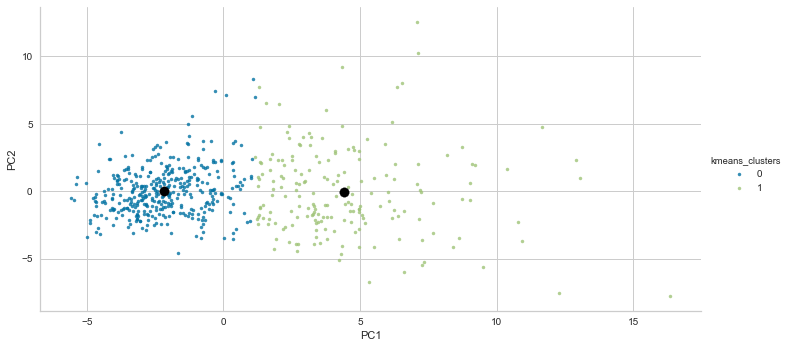

In [30]:
sns.lmplot(x = "PC1", y = "PC2", data = X_pca, hue='kmeans_clusters', fit_reg=False, 
           scatter_kws = {'s':12}, aspect = 2)
plt.scatter(model_groups_cluster_centers[0], 
            model_groups_cluster_centers[1], s = 90, color = 'black')
plt.show()

In [31]:
X_pca['actual_label'] = actual_labels

In [32]:
print(confusion_matrix(X_pca['actual_label'], model_kmeans.labels_))

[[343  14]
 [ 37 175]]


In [33]:
print(classification_report(X_pca['actual_label'], model_kmeans.labels_))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       357
           1       0.93      0.83      0.87       212

    accuracy                           0.91       569
   macro avg       0.91      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



In [34]:
print("Measure inertia %s" % model_kmeans.inertia_)

Measure inertia 8991.825171606994


In [35]:
X_pca = X_pca.drop(['actual_label','kmeans_clusters'], axis=1)
X_pca.head(5)

,PC1,PC2,PC3,PC4,PC5
0,9.192837,1.948583,-1.123166,3.633733,-1.195112
1,2.387802,-3.768172,-0.529293,1.118263,0.621776
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086
3,7.122953,10.275589,-3.232790,0.152547,-2.960878
4,3.935302,-1.948072,1.389767,2.940639,0.546748


## Hierchical Clustering using PCs

In [36]:
model_hierarchical = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
print(model_hierarchical)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)


In [37]:
model_hierarchical_fit = model_hierarchical.fit(X_pca)
model_hierarchical_fit.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [38]:
hierarchical_clusters = model_hierarchical_fit.fit_predict(X_pca)
print("Number of unique clusters: %s" % np.unique(hierarchical_clusters))

Number of unique clusters: [0 1]


In [39]:
X_pca['hierarchical_clusters'] = hierarchical_clusters
X_pca['actual_label'] = actual_labels
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,hierarchical_clusters,actual_label
0,9.192837,1.948583,-1.123166,3.633733,-1.195112,0,1
1,2.387802,-3.768172,-0.529293,1.118263,0.621776,0,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,0,1
4,3.935302,-1.948072,1.389767,2.940639,0.546748,0,1


In [40]:
print(confusion_matrix(1 - X_pca['actual_label'], model_hierarchical_fit.labels_))

[[160  52]
 [ 23 334]]


In [41]:
print(classification_report(1 - X_pca['actual_label'], model_hierarchical_fit.labels_))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       212
           1       0.87      0.94      0.90       357

    accuracy                           0.87       569
   macro avg       0.87      0.85      0.85       569
weighted avg       0.87      0.87      0.87       569



In [42]:
X_pca = X_pca.drop(['actual_label','hierarchical_clusters'], axis=1)
X_pca.head(5)

,PC1,PC2,PC3,PC4,PC5
0,9.192837,1.948583,-1.123166,3.633733,-1.195112
1,2.387802,-3.768172,-0.529293,1.118263,0.621776
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086
3,7.122953,10.275589,-3.232790,0.152547,-2.960878
4,3.935302,-1.948072,1.389767,2.940639,0.546748


## DBSCAN

In [43]:
from sklearn.neighbors import NearestNeighbors

In [44]:
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)

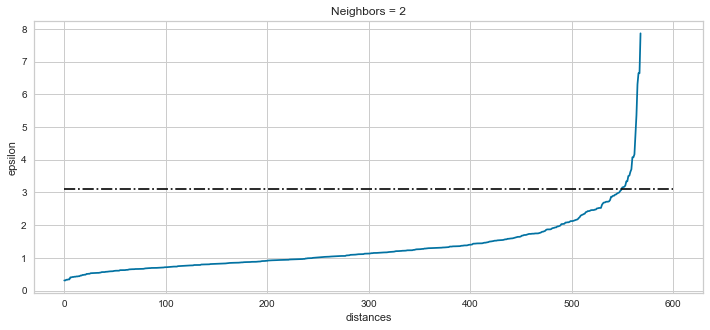

In [46]:
distances = np.sort(distances, axis=0)
dist = distances[:,1]

plt.figure(figsize = (12,5))
plt.plot(dist)
plt.plot(np.array([0, 600]), np.array([3.1, 3.1]), "-." , color = "k")

plt.ylabel("epsilon")
plt.xlabel("distances")
plt.title("Neighbors = 2")

plt.show()

In [47]:
model_dbscan = DBSCAN(eps = 3.1, min_samples = 125)
print(model_dbscan)

DBSCAN(algorithm='auto', eps=3.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=125, n_jobs=None, p=None)


In [48]:
model_dbscan_fit = model_dbscan.fit(X_pca)
model_dbscan_fit.labels_ 

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1,  0,
       -1, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
       -1,  0, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1, -1,  0,
       -1,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1,
        0,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1, -1, -1,
        0,  0, -1, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1,
        0,  0,  0, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0,  0, -1,  0,
        0,  0, -1,  0,  0,  0, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0

In [50]:
dbscan_clusters = model_dbscan_fit.fit_predict(X_pca)
print("Number of unique clusters: %s" % np.unique(dbscan_clusters))

Number of unique clusters: [-1  0]


In [51]:
X_pca['dbscan_clusters'] = dbscan_clusters + 1
X_pca['actual_label'] = actual_labels
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,dbscan_clusters,actual_label
0,9.192837,1.948583,-1.123166,3.633733,-1.195112,0,1
1,2.387802,-3.768172,-0.529293,1.118263,0.621776,0,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,0,1
4,3.935302,-1.948072,1.389767,2.940639,0.546748,0,1


In [52]:
print(confusion_matrix(1 - X_pca['actual_label'], model_dbscan_fit.labels_ + 1))

[[158  54]
 [ 35 322]]


In [53]:
print(classification_report(1 - X_pca['actual_label'], model_dbscan_fit.labels_ + 1))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       212
           1       0.86      0.90      0.88       357

    accuracy                           0.84       569
   macro avg       0.84      0.82      0.83       569
weighted avg       0.84      0.84      0.84       569



***

## ~ The End ~